In [1]:
import os
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import PlotTools.plot_tools as PTs
import maths_tools.MathsTools as MTs
from matplotlib.pyplot import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (15.,10)

In [2]:
# Options
LU_tags= ['_CultAR','_SemiPG']
AGR_tags= ['Composition_','Composition_']
data_names = ['CultAR','SemiPG']
COMPARISON_tag='CultAR_SemiPG_Comparison_postCalc'
nFILES=len(data_names)

In [3]:

############################
SOIL_DIR='/users/eow/edwcom/GREENHOUSE/SOIL_PROPERTIES/'
# Data
Data_Dir=SOIL_DIR+'datasets/'
BC_files= [ Data_Dir+'Merged_Soil_Weighted'+AGR_tag+'BCproperties_CHESSgrid'+LU_tag+'.nc' \
                   for AGR_tag,LU_tag in zip(AGR_tags,LU_tags) ]
VG_files= [ Data_Dir+'Merged_Soil_Weighted'+AGR_tag+'VGproperties_CHESSgrid'+LU_tag+'.nc' \
                   for AGR_tag,LU_tag in zip(AGR_tags,LU_tags) ]

CHESS_landcover_file='/users/eow/edwcom/CHESS/chess_landcover_2000.nc'
############################
# Output
plot_DIR=SOIL_DIR+'plots/'+COMPARISON_tag+'/'
os.system('mkdir -p '+plot_DIR)



0

In [4]:
print(BC_files)

['/users/eow/edwcom/GREENHOUSE/SOIL_PROPERTIES/datasets/Merged_Soil_WeightedComposition_BCproperties_CHESSgrid_CultAR.nc', '/users/eow/edwcom/GREENHOUSE/SOIL_PROPERTIES/datasets/Merged_Soil_WeightedComposition_BCproperties_CHESSgrid_SemiPG.nc']


In [5]:
fill_value=-9999.
Soil_Layer_Thick=np.array([0.1,0.25,0.65,2.0])   #(metres)
Soil_Layer_Depth=np.array([0.1,0.35,1.0,3.0]) #(metres)
nSD=len(Soil_Layer_Thick)


In [6]:
# Open and Read Composition File
BC_Dict={}

for iSRC in range(nFILES):
    BC_Dict[data_names[iSRC]]={}
    BCinf=nc.Dataset(BC_files[iSRC],'r')
    for var in BCinf.variables:
        if var not in ['x','y','z']:
            BC_Dict[data_names[iSRC]][var]=BCinf.variables[var][:]
    BCinf.close()
    

BC_varnames=list(BC_Dict[data_names[0]].keys())


In [7]:
print(iSRC,BC_files[iSRC])
print (BC_varnames)

1 /users/eow/edwcom/GREENHOUSE/SOIL_PROPERTIES/datasets/Merged_Soil_WeightedComposition_BCproperties_CHESSgrid_SemiPG.nc
['BC_satcon', 'BC_sm_wilt', 'BC_sathh', 'BC_sm_sat', 'BC_hcap', 'BC_hcon', 'BC_bexp', 'BC_sm_crit']


In [8]:
# Open and Read Composition File
VG_Dict={}

for iSRC in range(nFILES):
    VG_Dict[data_names[iSRC]]={}
    VGinf=nc.Dataset(VG_files[iSRC],'r')
    for var in VGinf.variables:
        if var not in ['x','y','z']:
            VG_Dict[data_names[iSRC]][var]=VGinf.variables[var][:]
    VGinf.close()


In [9]:
#read in latlon/xy data from chess_landcover
LLinf=nc.Dataset(CHESS_landcover_file,'r')
lats=LLinf.variables['lat'][:]
lons=LLinf.variables['lon'][:]
landcover=LLinf.variables['frac'][:]
LLinf.close()
#LAND_MASK=landcover.mask[0,:]
CROP=landcover[4,:]


In [10]:
#plt.imshow(CROP,origin='bottom',vmin=0,vmax=1)
#plt.colorbar()

In [11]:
#print(BC_Dict[data_names[0]]['BC_sm_crit'].min())
#print(VG_Dict[data_names[0]]['VG_sm_wilt'].max())

param_metadata = {'bexp': {'data_range':[0,12],'diff_range':[-1,1],'sclfac':1,'units':'-','title':'b exponent'}, \
                  'sathh': {'data_range':[0,1.2],'diff_range':[-0.1,0.1],'sclfac':1,'units':'m','title':'Matric Suction at Saturation'}, \
                  'satcon': {'data_range':[0,30],'diff_range':[-2,2],'sclfac':1e3,'units':'mm s$^{-1}$','title':'Hydraulic Conductivty at Saturation'}, \
                  'hcon': {'data_range':[0.15,0.3],'diff_range':[-0.03,0.03],'sclfac':1,'units':'W m$^{-1}$ K$^{-1}$','title':'Dry Thermal Conductivity'}, \
                  'hcap': {'data_range':[1.,1.4],'diff_range':[-0.1,0.1],'sclfac':1e-6,'units':'MJ m$^{-3}$ K$^{-1}$','title':'Dry Heat Capacity'}, \
                  'sm_sat': {'data_range':[0.3,0.6],'diff_range':[-0.1,0.1],'sclfac':1,'units':'m$^{-3}$ m$^{-3}$','title':'Soil Moisture at Saturation'}, \
                  'sm_wilt': {'data_range':[0.1,0.4],'diff_range':[-0.1,0.1],'sclfac':1,'units':'m$^{-3}$ m$^{-3}$','title':'Soil Moisture at Wilting Point'}, \
                  'sm_crit': {'data_range':[0.2,0.5],'diff_range':[-0.1,0.1],'sclfac':1,'units':'m$^{-3}$ m$^{-3}$','title':'Soil Moisture at Critical Point'}, \
                  'oneoveralpha': {'data_range':[0,1],'diff_range':[-1,1],'sclfac':1,'units':'m$^{-1}$','title':'one over alpha'}, \
                  'oneovernminusone': {'data_range':[0,12],'diff_range':[-1,1],'sclfac':1,'units':'-','title':'one over n minus one'}, \
                  'ksat': {'data_range':[0,30],'diff_range':[-2,2],'sclfac':1e3,'units':'mm s$^{-1}$','title':'Hydraulic Conductivty at Saturation'}, \
                  }

#metadict=param_metadata[param[3:]]
#print(param)
#print(metadict)

In [12]:
#print(varnames.pop(varnames.index('VG_Soil_Texture')))
#print(varnames)

VG_oneovernminusone


/users/eow/edwcom/miniconda3/lib/python3.5/site-packages/numpy/ma/core.py:966: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


VG_sm_sat


/users/eow/edwcom/miniconda3/lib/python3.5/site-packages/numpy/ma/core.py:966: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


VG_hcap
VG_hcon
VG_oneoveralpha
VG_sm_crit
VG_sm_wilt
VG_ksat


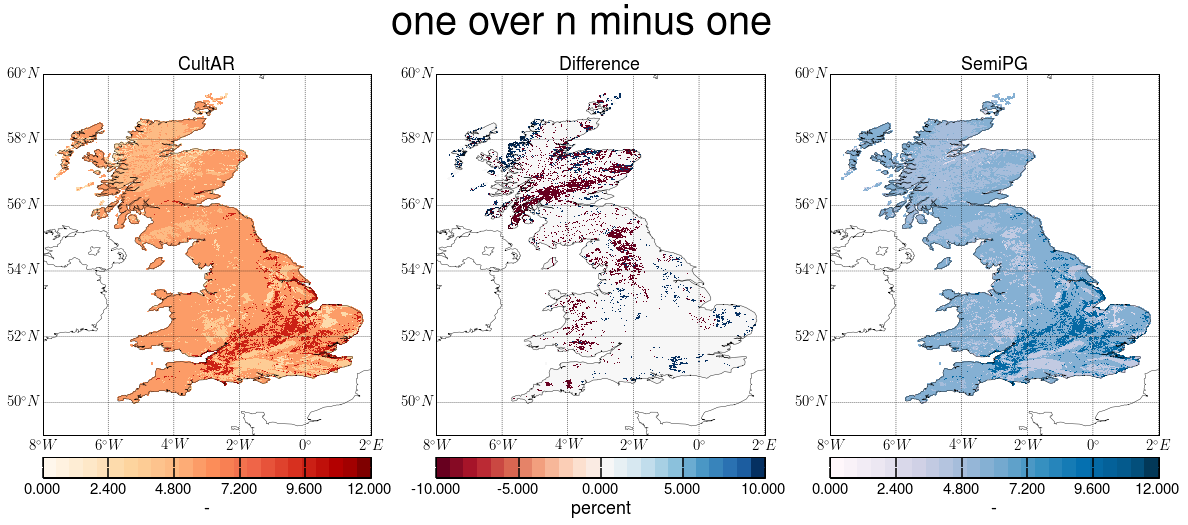

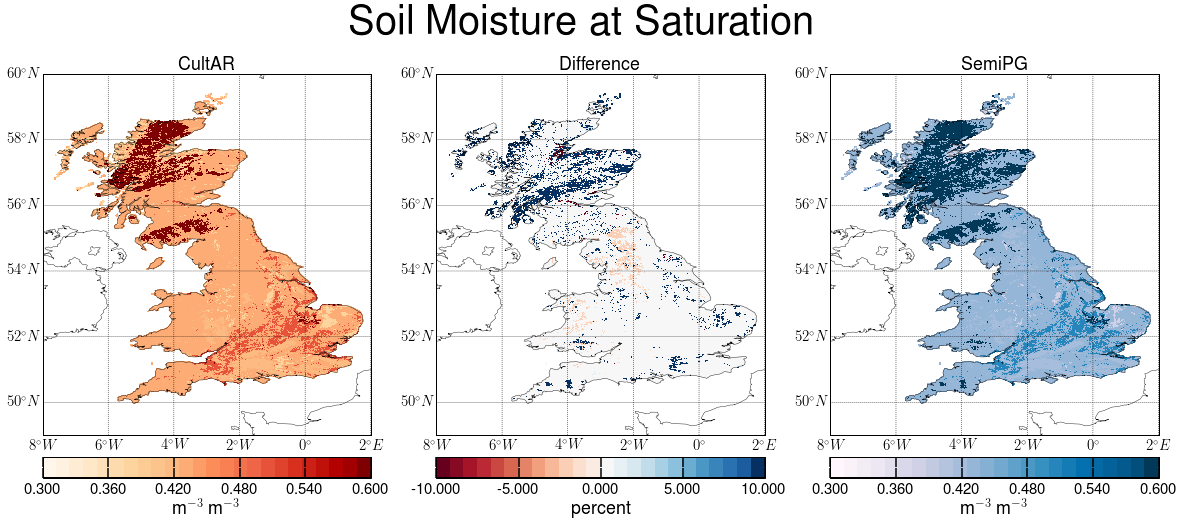

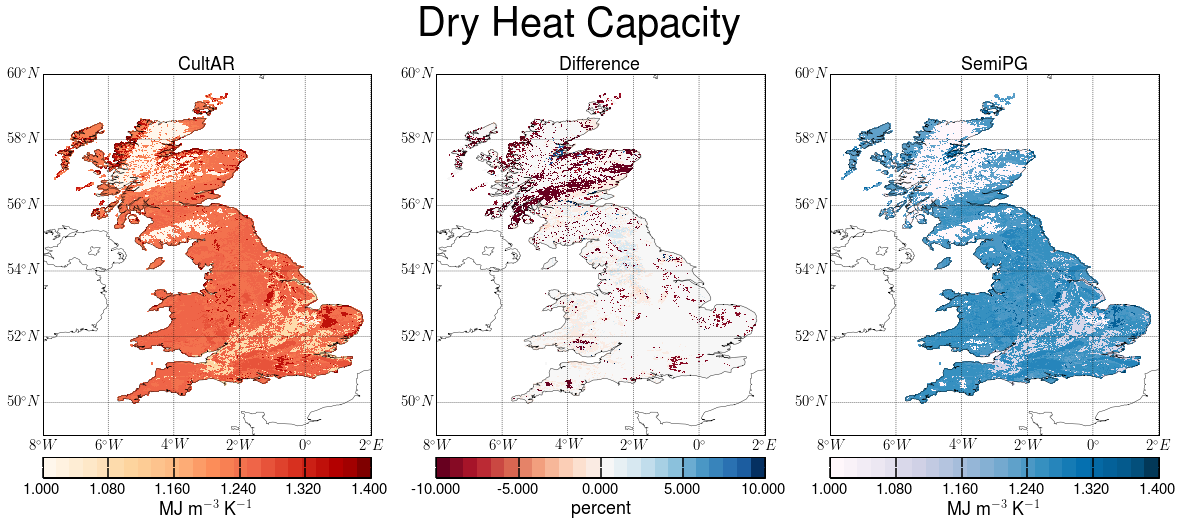

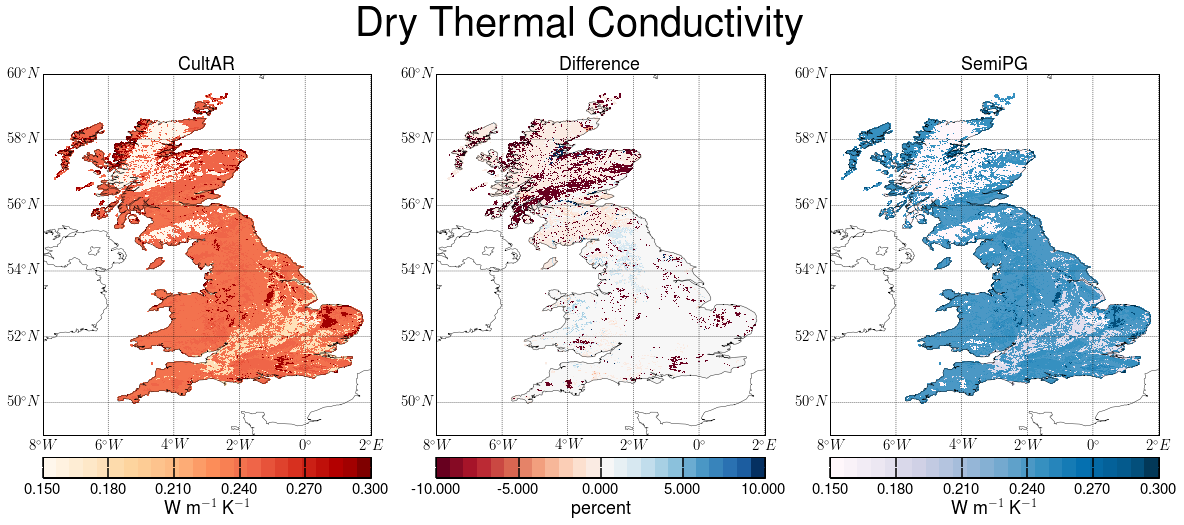

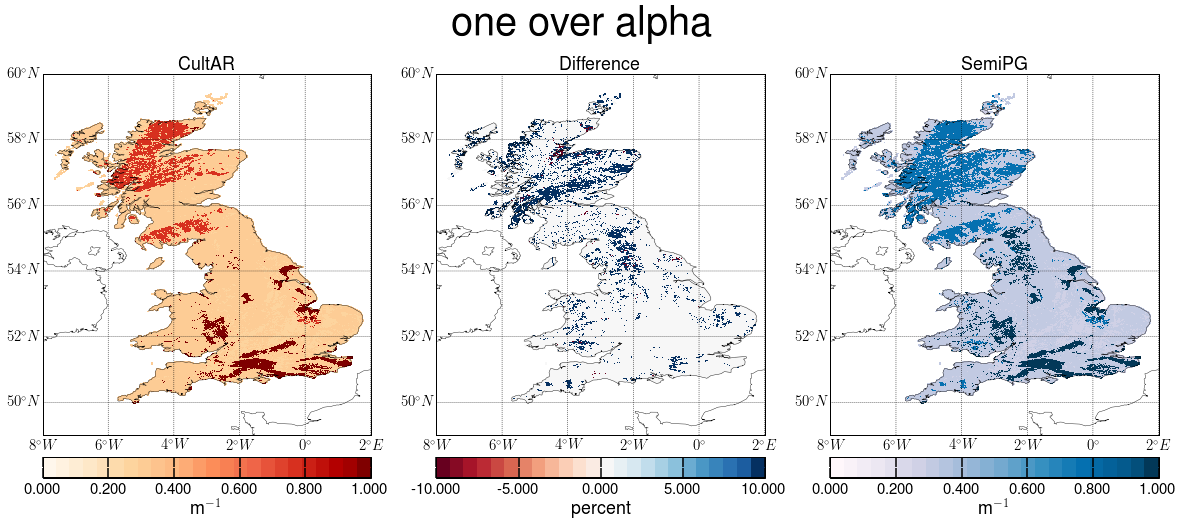

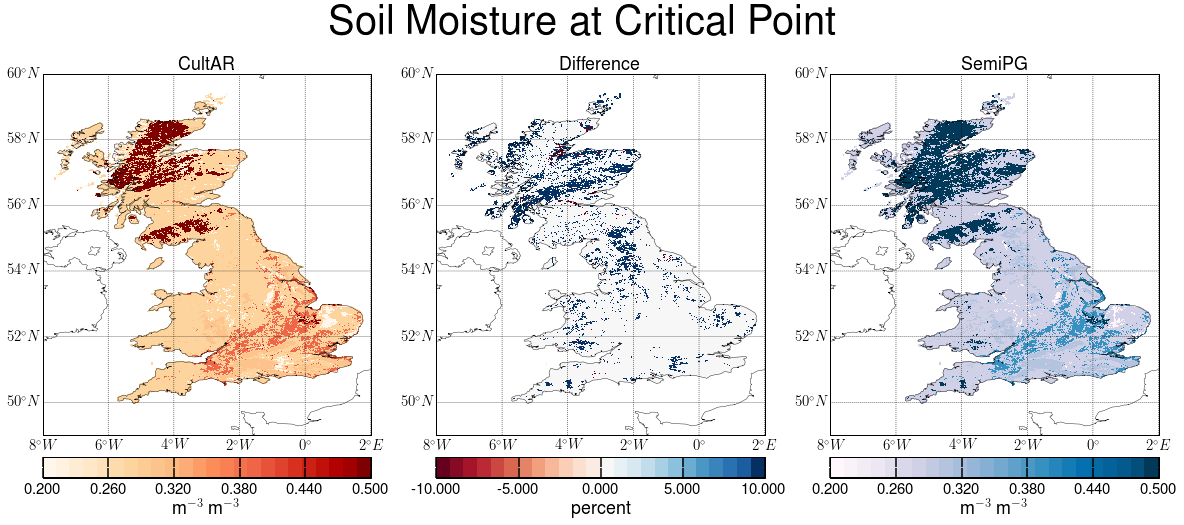

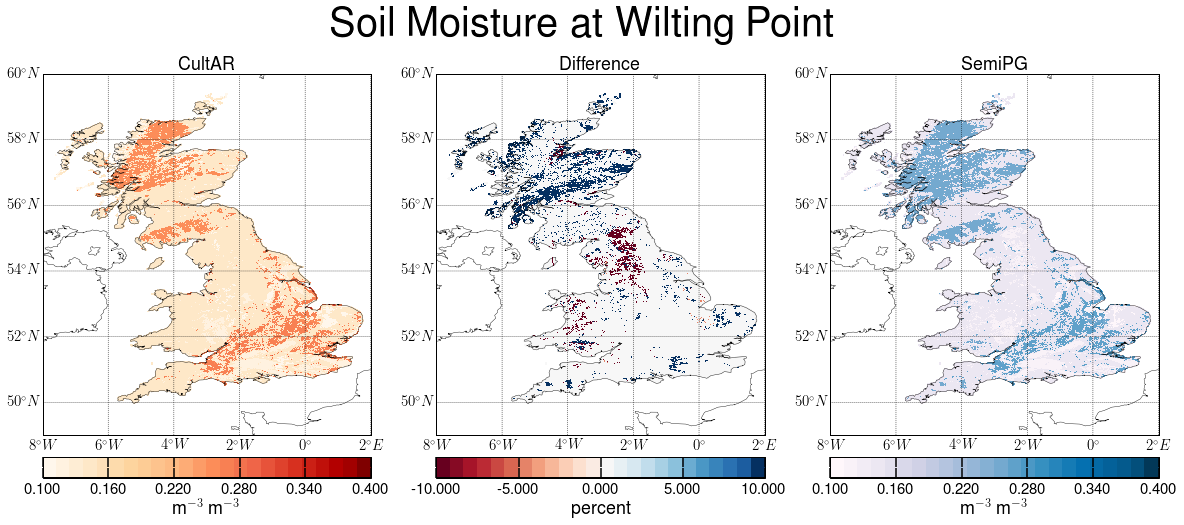

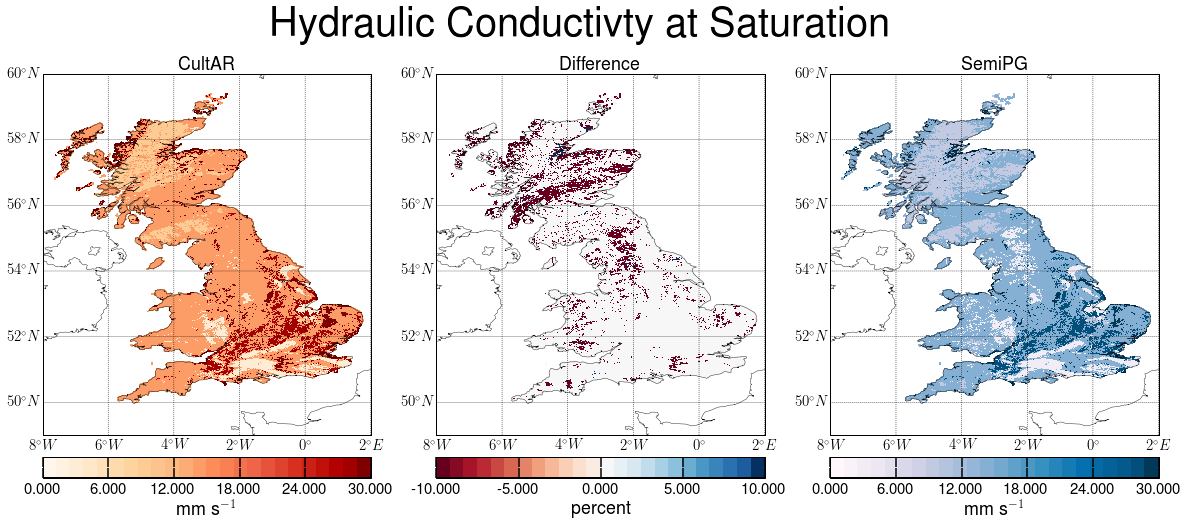

In [ ]:
iSD=0
MPL_CBARS=['OrRd','RdBu','PuBu']
DICT=VG_Dict
varnames=list(DICT[data_names[0]].keys())
if 'VG_Soil_Texture' in varnames:
    varnames.pop(varnames.index('VG_Soil_Texture'))

for param in varnames:
    print(param)
    metadict=param_metadata[param[3:]]
    # get the top soil layer "param" data for the sources
    plot_DATALIST = [DICT[data_name][param][iSD,:]*metadict['sclfac'] \
                         for data_name in data_names]
    # Get the data range of the input data to 1 significant figure
    DATARANGE=[ MTs.round2SignifFigs(min([dat.min() for dat in plot_DATALIST]),2), \
                MTs.round2SignifFigs(max([dat.max() for dat in plot_DATALIST]),2)  ]
    # append the difference between the first two sources
    #   change: insert into index position 1 for asthetic plotting reasons
    plot_DATALIST.insert(1,(plot_DATALIST[1]-plot_DATALIST[0]) * 2 * 100. / \
                            (plot_DATALIST[1]+plot_DATALIST[0]) )
    nplots=len(plot_DATALIST)
    plot_titles=data_names.copy()
    plot_titles.insert(1,'Difference')
    #plot_LATSLIST=[lats for iSD in range(nplots)]
    #plot_LONSLIST=[lons for iSD in range(nplots)]
    FIG,AXES=plt.subplots(ncols=nplots,nrows=1,figsize=(20,8))
    
    ## Plot Data 1 on left and data2 on right
    for iplt in [0,2]:
        PTs.plot_map(plot_DATALIST[iplt],lons,lats,        \
                     DATA_RANGE=metadict['data_range'],AXIS=AXES[iplt],\
                     MPL_CBAR=MPL_CBARS[iplt],NLEVELS=25,\
                     CBAR_ORIENTATION='horizontal',NTICKS=6,CBAR_LABEL=metadict['units'], \
                     LATDEL=2,LONDEL=2,LON_RANGE=[-8,2],RESOLUTION='i',\
                     PLOT_TITLE=plot_titles[iplt],FONTSIZES=[15,15,18,18], \
                    )
    
    # PLot difference in the middle
    iplt=1
    PTs.plot_map(plot_DATALIST[iplt],lons,lats,        \
                 DATA_RANGE=[-10,10],AXIS=AXES[iplt], \
                 MPL_CBAR=MPL_CBARS[iplt],NLEVELS=25,\
                 CBAR_ORIENTATION='horizontal',NTICKS=5,CBAR_LABEL='percent', \
                 LATDEL=2,LONDEL=2,LON_RANGE=[-8,2],RESOLUTION='i',\
                 PLOT_TITLE=plot_titles[iplt],FONTSIZES=[15,15,18,18], \
                )
    
    FIG.suptitle(metadict['title'],fontsize=40)
    FIG.savefig(plot_DIR+param+'_percdiff.png',bbox_inches='tight')



In [ ]:
iSD=0
MPL_CBARS=['OrRd','RdBu','PuBu']
DICT=BC_Dict
varnames=list(DICT[data_names[0]].keys())
if 'VG_Soil_Texture' in varnames:
    varnames.pop(varnames.index('VG_Soil_Texture'))

for param in varnames:
    print(param)
    metadict=param_metadata[param[3:]]
    # get the top soil layer "param" data for the sources
    plot_DATALIST = [DICT[data_name][param][iSD,:]*metadict['sclfac'] \
                         for data_name in data_names]
    # Get the data range of the input data to 1 significant figure
    DATARANGE=[ MTs.round2SignifFigs(min([dat.min() for dat in plot_DATALIST]),2), \
                MTs.round2SignifFigs(max([dat.max() for dat in plot_DATALIST]),2)  ]
    # append the difference between the first two sources
    #   change: insert into index position 1 for asthetic plotting reasons
    plot_DATALIST.insert(1,(plot_DATALIST[1]-plot_DATALIST[0]) * 2 * 100. / \
                            (plot_DATALIST[1]+plot_DATALIST[0]) )
    nplots=len(plot_DATALIST)
    plot_titles=data_names.copy()
    plot_titles.insert(1,'Difference')
    #plot_LATSLIST=[lats for iSD in range(nplots)]
    #plot_LONSLIST=[lons for iSD in range(nplots)]
    FIG,AXES=plt.subplots(ncols=nplots,nrows=1,figsize=(20,8))
    
    ## Plot Data 1 on left and data2 on right
    for iplt in [0,2]:
        PTs.plot_map(plot_DATALIST[iplt],lons,lats,        \
                     DATA_RANGE=metadict['data_range'],AXIS=AXES[iplt],\
                     MPL_CBAR=MPL_CBARS[iplt],NLEVELS=25,\
                     CBAR_ORIENTATION='horizontal',NTICKS=6,CBAR_LABEL=metadict['units'], \
                     LATDEL=2,LONDEL=2,LON_RANGE=[-8,2],RESOLUTION='i',\
                     PLOT_TITLE=plot_titles[iplt],FONTSIZES=[15,15,18,18], \
                    )
    
    # PLot difference in the middle
    iplt=1
    PTs.plot_map(plot_DATALIST[iplt],lons,lats,        \
                 DATA_RANGE=[-10,10],AXIS=AXES[iplt], \
                 MPL_CBAR=MPL_CBARS[iplt],NLEVELS=25,\
                 CBAR_ORIENTATION='horizontal',NTICKS=5,CBAR_LABEL='percent', \
                 LATDEL=2,LONDEL=2,LON_RANGE=[-8,2],RESOLUTION='i',\
                 PLOT_TITLE=plot_titles[iplt],FONTSIZES=[15,15,18,18], \
                )
    
    FIG.suptitle(metadict['title'],fontsize=40)
    FIG.savefig(plot_DIR+param+'_percdiff.png',bbox_inches='tight')



BC_satcon


/users/eow/edwcom/miniconda3/lib/python3.5/site-packages/numpy/ma/core.py:966: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


BC_sm_wilt
BC_sathh
BC_sm_sat
BC_hcap
BC_hcon
BC_bexp
BC_sm_crit


In [ ]:
FIG,AXES=plt.subplots(nrows=1,ncols=2)

AXES[0].hist(BC_Dict['PreCalc']['BC_sm_sat'].flatten(),range=(0,1),bins=20)
AXES[1].hist(BC_Dict['PreCalc']['BC_sm_crit'].flatten(),range=(0,1),bins=20)


In [ ]:
print(plot_DIR)
print(param)

In [ ]:
#for param in ['hcap', 'sm_crit', 'sm_sat', 'hcon', 'sathh', 'satcon', 'sm_wilt', 'bexp']:
for param in ['hcap']:
    print(param)
    plot_DATALIST=[BC_Dict[param][iSD,:]*1e-6 for iSD in range(nSD)]
    Title='Brooks and Corey Properties - '+param.replace('_','-')
    FILEPLOT=plot_DIR+'BC_Property_'+param+'.png'
    COLOURS=['darkblue','blue','powderblue','ivory','khaki','coral','darkred']
    PTs.plot_map_multi(plot_DATALIST,plot_LONSLIST,plot_LATSLIST,\
                        Ncols=2,Nrows=2, FIGSIZE=(20,24), \
                        COMMON_CBAR=True, PLOT_TITLES=plot_titles, \
                        RESOLUTION='c', SUPTITLE=Title, \
                        INTERPOLATE_COLOURS=True, COLOURS=COLOURS,NLEVELS=250,\
                        LATDEL=2,LONDEL=2, LON_RANGE=[-8,2], DATA_RANGE=[1.0,1.4], \
                        FONTSIZES=[15,15,18,18], \
                        FILEPLOT=FILEPLOT, \
                       )


In [ ]:
for param in ['hcap']:
    print(param)
    plot_DATALIST=[BC_Dict[param][iSD,:]*1e-6 for iSD in range(nSD)]
    Title='Brooks and Corey Properties - '+param.replace('_','-')
    FILEPLOT=plot_DIR+'BC_Property_'+param+'.png'
    PTs.plot_map_multi(plot_DATALIST,plot_LONSLIST,plot_LATSLIST,\
                        Ncols=2,Nrows=2, FIGSIZE=(20,24), \
                        COMMON_CBAR=True, PLOT_TITLES=plot_titles, \
                        RESOLUTION='c', SUPTITLE=Title, \
                        MPL_CBAR='RdYlBu_r',NLEVELS=250,\
                        LATDEL=2,LONDEL=2, LON_RANGE=[-8,2], DATA_RANGE=[1.0,1.4], \
                        FONTSIZES=[15,15,18,18], \
                        FILEPLOT=FILEPLOT, \
                       )

In [ ]:
VG_Dict.keys()